In [1]:
# debugging and formatter
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
import time

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
#!pipenv install faker

<IPython.core.display.Javascript object>

Faker is a Python package that generates fake data for you. Whether you need to create datasets that contain certains types of features and targets, or anonymize data taken from a production service, Faker is for you.


In [3]:
# https://faker.readthedocs.io/
from faker import Faker

fake = Faker()

<IPython.core.display.Javascript object>

# Creating synthetic data

### Timeseries 

In [ ]:
def faker_timeseries_rows(num=1, seed=None):
    """
    """
    fake.seed_instance(seed)

    time_gen = fake.time_series(start_date=f"-{num}d", end_date="now", precision=3600)

    output = [
        {
            "datetime": next(time_gen),
            "name": fake.last_name(),
            "email": fake.free_email(),
            "country": fake.country(),
        }
        for x in range(num)
    ]
    return output

In [17]:
df = pd.DataFrame(faker_timeseries_rows(10, seed=0))
df.head(5)


datetime   name  \
0   (2020-01-18 13:05:50, 3039.918665490173)  Chang   
1  (2020-01-18 14:05:50, 1091.9258138841387)  Woods   
2   (2020-01-18 15:05:50, 2226.128388031194)   King   
3   (2020-01-18 16:05:50, 2627.394293736463)  Nolan   
4  (2020-01-18 17:05:50, 3286.8397916564336)   Levy   

                       email                country  
0    jonathandixon@yahoo.com  Sao Tome and Principe  
1        rebecca82@gmail.com  Saint Kitts and Nevis  
2       qmcgrath@hotmail.com       French Polynesia  
3         thomas15@yahoo.com             Mozambique  
4  michellegreen@hotmail.com                   Mali

<IPython.core.display.Javascript object>

### Categorical data

In [19]:
def faker_categorical(num=1, seed=None):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)

    output = [
        {
            "name": fake.last_name(),
            "email": fake.free_email(),
            "country": np.random.choice(["United Kingdom", "France", "Belgium"]),
            "gender": np.random.choice(["M", "F", "Not Specified"], p=[0.3, 0.6, 0.1]),
            "avg_rating": np.random.choice(
                np.arange(0, 6, 1), p=[0.5, 0.05, 0.05, 0.30, 0.05, 0.05]
            ),
        }
        for x in range(num)
    ]
    return output

<IPython.core.display.Javascript object>

In [20]:
df = pd.DataFrame(faker_categorical(num=100, seed=0))
df.head(5)

name               email         country gender  avg_rating
0   Richard   nfisher@yahoo.com  United Kingdom      F           3
1  Sullivan   yturner@yahoo.com          France      F           0
2  Odonnell  juan19@hotmail.com         Belgium      M           0
3    Archer   janet92@gmail.com          France      F           1
4     Blair   ysutton@gmail.com  United Kingdom      F           3

<IPython.core.display.Javascript object>

([<matplotlib.axis.XTick at 0x7f9ac020c748>,
 <a list of 6 Text xticklabel objects>)

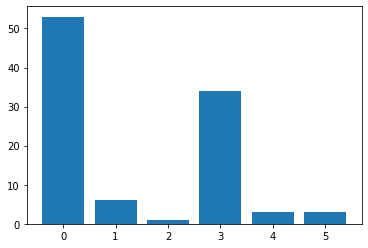

<IPython.core.display.Javascript object>

In [21]:
plt.bar(df["avg_rating"].value_counts().index, df["avg_rating"].value_counts().values)
plt.xticks(df["avg_rating"].value_counts().index, df["avg_rating"].value_counts().index)

### Imbalanced data

In [23]:
def imbalanced_data(num=1, seed=None):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)

    output = [
        {
            "name": fake.last_name(),
            "email": fake.free_email(),
            "country": np.random.choice(["United Kingdom", "France", "Belgium"]),
            "gender": np.random.choice(["M", "F", "Not Specified"], p=[0.3, 0.6, 0.1]),
            "avg_rating": np.random.choice(
                np.arange(0, 6, 1), p=[0.5, 0.1, 0.1, 0.1, 0.1, 0.1]
            ),
            "long_tailed": np.random.lognormal(3, 1, 1)[0],
            "target": np.random.binomial(1, 0.05, 1)[0],
        }
        for x in range(num)
    ]
    return output

<IPython.core.display.Javascript object>

In [24]:
%%time
df = pd.DataFrame(imbalanced_data(num=10000, seed=0))
df.head(5)

CPU times: user 2.97 s, sys: 9.7 ms, total: 2.98 s
Wall time: 2.98 s


name               email         country gender  avg_rating  \
0   Richard   nfisher@yahoo.com  United Kingdom      F           4   
1  Sullivan   yturner@yahoo.com         Belgium      F           4   
2  Odonnell  juan19@hotmail.com         Belgium      F           4   
3    Archer   janet92@gmail.com  United Kingdom      M           0   
4     Blair   ysutton@gmail.com         Belgium      M           4   

   long_tailed  target  
0    21.560421       0  
1    21.607520       1  
2     1.775435       0  
3    12.768028       0  
4    82.630362       0

<IPython.core.display.Javascript object>

In [25]:
x = df["target"].value_counts().index
y = df["target"].value_counts().values
plt.xticks(x, x)
_ = plt.bar(x, y)

<IPython.core.display.Javascript object>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
name           10000 non-null object
email          10000 non-null object
country        10000 non-null object
gender         10000 non-null object
avg_rating     10000 non-null int64
long_tailed    10000 non-null float64
target         10000 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


<IPython.core.display.Javascript object>

In [27]:
df.to_csv("data/fake_data.csv")

<IPython.core.display.Javascript object>

The problem with creating synthetic datasets that have more than 1 feature is that there are no relationships between features, as they are random.
This leads to poor quality in terms of insights as all columns are independent from each other. 
